In [227]:
# Test de vega sous windows : echec encore
# Avec super environnement python virtuel très propre python 3.9.10
#notebook 6.4.10
#jupyter --version

'''
Selected Jupyter core packages...
IPython          : 8.1.1
ipykernel        : 6.9.2
ipywidgets       : 7.7.0
jupyter_client   : 7.1.2
jupyter_core     : 4.9.2
jupyter_server   : 1.15.6
jupyterlab       : 3.3.2
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.2.0
notebook         : 6.4.10
qtconsole        : 5.2.2
traitlets        : 5.1.1
'''

'\nSelected Jupyter core packages...\nIPython          : 8.1.1\nipykernel        : 6.9.2\nipywidgets       : 7.7.0\njupyter_client   : 7.1.2\njupyter_core     : 4.9.2\njupyter_server   : 1.15.6\njupyterlab       : 3.3.2\nnbclient         : 0.5.13\nnbconvert        : 6.4.4\nnbformat         : 5.2.0\nnotebook         : 6.4.10\nqtconsole        : 5.2.2\ntraitlets        : 5.1.1\n'

In [228]:
import pandas as pd

from vega import VegaLite

import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/vega/ipyvega/master/notebooks/cars.json')

print(df.shape)

print(df.head())

VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "mark": "point",
  "encoding": {
    "y": {"type": "quantitative", "field": "Acceleration"},
    "x": {"type": "quantitative", "field": "Horsepower"}
  }
}, df)

(406, 9)
                        Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration  Year Origin  
0       130.0           3504          12.0  1970    USA  
1       165.0           3693          11.5  1970    USA  
2       150.0           3436          11.0  1970    USA  
3       150.0           3433          12.0  1970    USA  
4       140.0           3449          10.5  1970    USA  


# Reprise des données préparées par Paul dans l'autre script

In [229]:
import csv
from collections import defaultdict
from typing import TypedDict
import json

class MonthDataPoint(TypedDict):
    month: str 
    destination: str
    nb_conge: int
    year: int


destination_month_destination = []

total_by_month = defaultdict(int)

MONTHS = ["01 Janvier","02 Février"," 03 Mars","04 Avril","05 Mai","06 Juin","07 Juillet","08 Août","09 Septembre","10 Octobre","11 Novembre","12 Décembre"]
year_file = [(1790, "./data/PFISTER_PORTS_NAVIRES_TAB_91_p_342_1790.csv"), (1781, "./data/PFISTER_PORTS_NAVIRES_TAB_90_p_341_1781.csv")]
for (year, file) in year_file:
    with open(file, "r") as data:
        for row in csv.DictReader(data):
            
            for month in MONTHS:
                if month in row and row[month] != '':
                    data_point:MonthDataPoint = MonthDataPoint(
                        month= month,
                        destination= row['destination'],
                        nb_conge= int(row[month]),
                        year= year
                    )
                    destination_month_destination.append(data_point)
                    total_by_month[month] += int(row[month])

#print(json.dumps(destination_month_destination))

#[{"month": "01 Janvier", "destination": "Deal", "nb_conge": 19, "year": 1790}]

In [230]:
# Transformer en CSV (faire les agrégats et la jointure avec les données de ports pour faire la carto)

#print(destination_month_destination)

import pandas as pd
decennie = pd.DataFrame(destination_month_destination)
print(decennie.shape)

print(decennie.columns)

pd.unique(decennie['destination'])

#decennie  = decennie.set_index('destination')



(282, 4)
Index(['month', 'destination', 'nb_conge', 'year'], dtype='object')


array(['Deal', 'Douvres', 'Colchester', 'Folkestone', 'Maldon',
       'Whistable', 'Hasting', 'Feversham', 'Harwich', 'Burnham', 'Leigh',
       'Rye', 'Londres', 'Dungeness', 'Rochester', 'Yarmouth',
       'Brightlandsea', 'Margate', 'Lydd', 'Pegwell', 'Wivenhoe',
       'Aberdeen', 'Lynn', 'Milton', 'Reculver', 'Woodbridge',
       'Chichester', 'Dymchurch', 'Hythe', 'Barking', 'Foy', 'Guerneze',
       'Greenwith', 'Ipswich', 'Southwold', 'Eawsand & Chatham',
       'Gravesand', 'Colmay-Falmouth', 'Langley-Ramsay', 'Cowes', 'Leith',
       'Seasalter', 'Chatham', 'Sandgate', 'Liestaff', 'Bradwell',
       'Hanson', 'Norwich', 'Budleigh Salterton', 'Essex', 'Christchurch',
       'Topsham', 'Holy Island'], dtype=object)

# Récupérer les ports de navigo 


In [231]:
# Aller chercher les données de ports via l'API (à rajouter dans le load_data.sh)

#curl -o data/navigo_ports.csv "data.portic.fr/api/ports/?format=csv&srid=4326"



#ports = pd.read_csv("http://data.portic.fr/api/ports/?format=csv&srid=4326", encoding='utf8')

## Attention il y a un petit souci car l'API semble poster des vieux ports (ancienne version de la base)
## Du coup j'ai commité dans le module ports_09mars2022.csv avec ; comme séparateur, encodage utf8

ports = pd.read_csv("./data/ports_09mars2022.csv", encoding='latin1', sep=';')

In [232]:
print(ports.shape)

print(ports.columns)

ports.head()

# quel filtre : l'Angleterre ou plus largement Grande-Bretagne ?
test = ports.query('substate_1789_fr == "Angleterre"')
#test.head()

ports_anglais = ports.query('state_1789_fr == "Grande-Bretagne"')
ports_anglais['toponyme_standard_fr']

#ports_anglais = ports_anglais.set_index('toponyme_standard_fr')


(1433, 40)
Index(['latitude', 'longitude', 'toponyme_standard_fr', 'toponyme_standard_en',
       'uhgs_id', 'shiparea', 'state_1789_fr', 'substate_1789_fr',
       'state_1789_en', 'substate_1789_en', 'province', 'amiraute',
       'has_a_clerk', 'Nb_conges_1787_CR', 'nb_conges_1787_inputdone',
       'Nb_conges_1789_CR', 'nb_conges_1789_inputdone', 'status',
       'ferme_direction', 'ferme_bureau', 'ferme_bureau_uncertainty',
       'partner_balance_1789', 'partner_balance_supp_1789',
       'partner_balance_1789_uncertainty',
       'partner_balance_supp_1789_uncertainty', 'toponyme', 'toustopos',
       'geonameid', 'relation_state', 'topofreq', 'geom', 'point3857',
       'country2019_name', 'country2019_iso2code', 'country2019_region',
       'ogc_fid', 'belonging_states', 'belonging_substates',
       'belonging_states_en', 'belonging_substates_en'],
      dtype='object')


829               Chester
830              Penzance
831            cap Lizard
832               Padstow
833              Falmouth
              ...        
1064           Burry Port
1065             Barmouth
1066             Cardigan
1067    Baie de Gibraltar
1068            Gibraltar
Name: toponyme_standard_fr, Length: 240, dtype: object

# Joindre les ports avec les flux récupéré des données de Christian par le nom des ports (fuzzy )

In [233]:
ports_anglais

#ports_anglais['toponyme']=='Deal'
ports.query('toponyme_standard_fr == "Deal"')

,latitude,longitude,toponyme_standard_fr,toponyme_standard_en,uhgs_id,shiparea,state_1789_fr,substate_1789_fr,state_1789_en,substate_1789_en,...,geom,point3857,country2019_name,country2019_iso2code,country2019_region,ogc_fid,belonging_states,belonging_substates,belonging_states_en,belonging_substates_en
893,51.216667,1.4,Deal,Deal,A0386686,NOR-DOVE,Grande-Bretagne,Angleterre,Great Britain,England,...,0101000020E6100000666666666666F63FAC8F87BEBB9B...,0101000020110F000022A2004C3A060341075CCB5D9F67...,United Kingdom,GB,150.0,819,"[{""1749-1815"" : ""Grande-Bretagne""}]","[{""1749-1815"" : ""Angleterre""}]","[{""1749-1815"" : ""Great Britain""}]","[{""1749-1815"" : ""England""}]"


In [234]:
decennie.query('destination == "Deal"')

,month,destination,nb_conge,year
0,01 Janvier,Deal,19,1790
1,03 Mars,Deal,14,1790
2,04 Avril,Deal,15,1790
3,05 Mai,Deal,7,1790
4,06 Juin,Deal,11,1790
5,07 Juillet,Deal,18,1790
6,09 Septembre,Deal,17,1790
7,10 Octobre,Deal,13,1790
8,11 Novembre,Deal,14,1790
178,01 Janvier,Deal,12,1781


In [235]:
#result = pd.concat([decennie, ports_anglais], axis=1)

result = pd.merge(
    decennie,
    ports_anglais,
    how="outer",
    left_on='destination',
    right_on='toponyme_standard_fr',
    sort=True,
    #indicator=True,
    indicator="indicator_column"
)

In [236]:
## Liste de ceux qu'on ne trouve pas dans ports

#result.query('destination == "Deal"')
pd.unique(result.query('indicator_column == "left_only"')['destination'])
#result.query('indicator_column == "left_only"')


array(['Bradwell', 'Brightlandsea', 'Budleigh Salterton', 'Chatham',
       'Christchurch', 'Colmay-Falmouth', 'Dymchurch',
       'Eawsand & Chatham', 'Essex', 'Feversham', 'Foy', 'Gravesand',
       'Greenwith', 'Guerneze', 'Hanson', 'Holy Island', 'Langley-Ramsay',
       'Leigh', 'Liestaff', 'Lynn', 'Milton', 'Norwich', 'Pegwell',
       'Reculver', 'Seasalter'], dtype=object)

In [237]:
#ports.query('toponyme == "Chatham "')
#.str.contains("abc")

#ports_anglais.query('"Chatham" <= toponyme_standard_fr <= "Chatham~"')
#(ports_anglais.query('toponyme_standard_fr.str.contains("Chatham")'))['toponyme_standard_fr']
#Chatham 
print("Londres".casefold())

#(ports_anglais.query('toponyme_standard_fr.str.casefold().contains("Londres".casefold())'))['toponyme_standard_fr']

ports_anglais.query('toponyme_standard_fr.str.contains("Londres") or toponyme_standard_en.str.contains("Londres")')
#ports_anglais.query('toponyme_standard_fr.str.contains("Londres")')
ports_anglais.query('toponyme_standard_fr.str.contains("Londres") or toponyme_standard_en.str.contains("Londres")') #Ok
ports_anglais.query('toponyme_standard_fr.str.contains("msa") or toponyme_standard_en.str.contains("msa")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Langley-Ramsay / 

#Pas trouvés
ports_anglais.query('toponyme_standard_fr.str.contains("Bradwell") or toponyme_standard_en.str.contains("Bradwell")') #Bradwell / 
ports_anglais.query('toponyme_standard_fr.str.contains("hris") or toponyme_standard_en.str.contains("hris")') #Christchurch /
ports_anglais.query('toponyme_standard_fr.str.contains("yn") or toponyme_standard_en.str.contains("yn")')['toustopos'] #Dymchurch / 
ports_anglais.query('toponyme_standard_fr.str.contains("f") or toponyme_standard_en.str.contains("f")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Foy / 
ports_anglais.query('toponyme_standard_fr.str.contains("ans") or toponyme_standard_en.str.contains("ans")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Hanson / 
ports_anglais.query('toponyme_standard_fr.str.contains("sland") or toponyme_standard_en.str.contains("sland")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #'Holy Island / 
ports_anglais.query('toponyme_standard_fr.str.contains("Li") or toponyme_standard_en.str.contains("Li")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Liestaff / Liestaff	
ports_anglais.query('toponyme_standard_fr.str.contains("or") or toponyme_standard_en.str.contains("wich")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Norwich / 	
ports_anglais.query('toponyme_standard_fr.str.contains("gw") or toponyme_standard_en.str.contains("gw")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Pegwell / 	
ports_anglais.query('toponyme_standard_fr.str.contains("sel") or toponyme_standard_en.str.contains("sel")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Seasalter / 	Wells on Sea	
ports_anglais.query('toponyme_standard_fr.str.contains("lton") or toponyme_standard_en.str.contains("Mi")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Milton / Middleton ou Walton	?	

#Trouvés
ports_anglais.query('toponyme_standard_fr.str.contains("sea") or toponyme_standard_en.str.contains("sea")') #Brightlandsea / Brightlingsea
ports_anglais.query('toponyme_standard_fr.str.contains("ud") or toponyme_standard_en.str.contains("ud")') #Budleigh Salterton / Saltfleet
ports_anglais.query('toponyme_standard_fr.str.contains("almouth") or toponyme_standard_en.str.contains("almouth")') #Colmay-Falmouth / Falmouth
ports_anglais.query('toponyme_standard_fr.str.contains("awsand") or toponyme_standard_en.str.contains("awsand")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Eawsand & Chatham / Chatham 
#Cawsand	Cawsand	MAN-PLYM	Devon shire
ports_anglais.query('toponyme_standard_fr.str.contains("Chatham") or toponyme_standard_en.str.contains("Chatham")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Chatham / Chatham
#905	Chatham	Chatham	NOR-THAM	Kent
ports_anglais.query('toponyme_standard_fr.str.contains("ssex") or toponyme_standard_en.str.contains("ssex")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Essex / Un port de l'essex comme Colchester
ports_anglais.query('toponyme_standard_fr.str.contains("Colchester") or toponyme_standard_en.str.contains("Colchester")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Essex / Un port de l'essex comme Colchester
ports_anglais.query('toponyme_standard_fr.str.contains("raves") or toponyme_standard_en.str.contains("raves")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Gravesand / Gravesend
ports_anglais.query('toponyme_standard_fr.str.contains("reenwi") or toponyme_standard_en.str.contains("reenw")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Greenwith / Greenwich
ports_anglais.query('toponyme_standard_fr.str.contains("Guerne") or toponyme_standard_en.str.contains("Guerne")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Guerneze / Guernesey
ports_anglais.query('toponyme_standard_fr.str.contains("Le") or toponyme_standard_en.str.contains("Le")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Leigh / Leith	
ports_anglais.query('toponyme_standard_fr.str.contains("Lynn") or toponyme_standard_en.str.contains("Lynn")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Lynn / King's Lynn	ou Lyme Regis	?	
ports_anglais.query('toponyme_standard_fr.str.contains("ulv") or toponyme_standard_en.str.contains("Re")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Reculver / Reculvers	





londres


,toponyme_standard_en,toponyme_standard_fr,shiparea,province,toustopos
856,Lyme Regis,Lyme Regis,MAN-PORT,Devon shire,Lynn Regis
904,Reculvers,Reculvers,NOR-THAM,Kent,NaN


In [238]:
# On remplace dans destination les noms de ports par ceux qui vont bien

#decennie.query('destination == "Deal"')
decennie['destination_fixed'] = decennie['destination']  
decennie.query('destination == "Brightlandsea"')['destination_fixed'] = 'Brightlingsea'

decennie = decennie.replace({'destination_fixed': 'Brightlandsea'}, 'Brightlingsea')
decennie = decennie.replace({'destination_fixed': 'Budleigh Salterton'}, 'Saltfleet')
decennie = decennie.replace({'destination_fixed': 'Colmay-Falmouth'}, 'Falmouth')
decennie = decennie.replace({'destination_fixed': 'Eawsand & Chatham'}, 'Chatham')  

decennie = decennie.replace({'destination_fixed': 'Essex'}, 'Colchester') 
decennie = decennie.replace({'destination_fixed': 'Gravesand'}, 'Gravesend')
decennie = decennie.replace({'destination_fixed': 'Greenwith'}, 'Greenwich')
decennie = decennie.replace({'destination_fixed': 'Guerneze'}, 'Guernesey')
decennie = decennie.replace({'destination_fixed': 'Leigh'}, 'Leith')
decennie = decennie.replace({'destination_fixed': 'Lynn'}, "King's Lynn")
decennie = decennie.replace({'destination_fixed': 'Reculver'}, 'Reculvers')

decennie.query('destination == "Brightlandsea"')['destination_fixed'] 





C:\Users\cplume01\AppData\Local\Temp\ipykernel_38216\3105923653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decennie.query('destination == "Brightlandsea"')['destination_fixed'] = 'Brightlingsea'


125    Brightlingsea
126    Brightlingsea
127    Brightlingsea
128    Brightlingsea
259    Brightlingsea
260    Brightlingsea
261    Brightlingsea
Name: destination_fixed, dtype: object

In [239]:
decennie.query('destination == "Reculver"')['destination_fixed'] 


152    Reculvers
153    Reculvers
154    Reculvers
155    Reculvers
Name: destination_fixed, dtype: object

In [240]:
## Chatham contient un caractère spécial dans ports_anglais 

#ports_anglais = ports_anglais.replace({'toponyme_standard_fr': 'Brightlandsea'}, 'Brightlingsea')
#ports_anglais.query('toponyme_standard_fr.str.contains("Chatham") or toponyme_standard_en.str.contains("Chatham")')[['uhgs_id','toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Chatham / Chatham
#A0404691
#ports_anglais.query('uhgs_id =="A0404691"')
#.replace({'destination_fixed': 'Brightlandsea'}, 'Brightlingsea')
#.replace({'uhgs_id': 'A0404691'}, 'Brightlingsea')

index_of_chatham = ports_anglais.index[(ports_anglais['uhgs_id'] == "A0404691")].tolist()[0]
print(index_of_chatham)
ports_anglais = ports_anglais.replace({'toponyme_standard_fr': {index_of_chatham: "Chatham"}})



905


In [241]:
ports_anglais.query('uhgs_id =="A0404691"')[['toponyme_standard_fr']]

,toponyme_standard_fr
905,Chatham


Refaire la jointure

In [258]:
result = pd.merge(
    decennie,
    ports_anglais,
    how="outer",
    left_on='destination_fixed',
    right_on='toponyme_standard_fr',
    sort=True,
    #indicator=True,
    indicator="indicator_column"
)

In [243]:
## Liste de ceux qu'on ne trouve pas dans ports

#result.query('destination == "Deal"')
pd.unique(result.query('indicator_column == "left_only"')['destination'])
#result.query('indicator_column == "left_only"')



array(['Bradwell', 'Eawsand & Chatham', 'Chatham', 'Christchurch',
       'Dymchurch', 'Feversham', 'Foy', 'Hanson', 'Holy Island',
       'Langley-Ramsay', 'Liestaff', 'Milton', 'Norwich', 'Pegwell',
       'Seasalter'], dtype=object)

In [259]:
## Those we keep to make the map

tomap = result.query('indicator_column != "left_only"')

print(tomap.columns)

pd.unique(tomap['year'])


Index(['month', 'destination', 'nb_conge', 'year', 'destination_fixed',
       'latitude', 'longitude', 'toponyme_standard_fr', 'toponyme_standard_en',
       'uhgs_id', 'shiparea', 'state_1789_fr', 'substate_1789_fr',
       'state_1789_en', 'substate_1789_en', 'province', 'amiraute',
       'has_a_clerk', 'Nb_conges_1787_CR', 'nb_conges_1787_inputdone',
       'Nb_conges_1789_CR', 'nb_conges_1789_inputdone', 'status',
       'ferme_direction', 'ferme_bureau', 'ferme_bureau_uncertainty',
       'partner_balance_1789', 'partner_balance_supp_1789',
       'partner_balance_1789_uncertainty',
       'partner_balance_supp_1789_uncertainty', 'toponyme', 'toustopos',
       'geonameid', 'relation_state', 'topofreq', 'geom', 'point3857',
       'country2019_name', 'country2019_iso2code', 'country2019_region',
       'ogc_fid', 'belonging_states', 'belonging_substates',
       'belonging_states_en', 'belonging_substates_en', 'indicator_column'],
      dtype='object')


array([1790.,   nan, 1781.])

## Agregate data for the map par port

In [245]:
import matplotlib.pyplot as plt
import pylab
import seaborn as sns



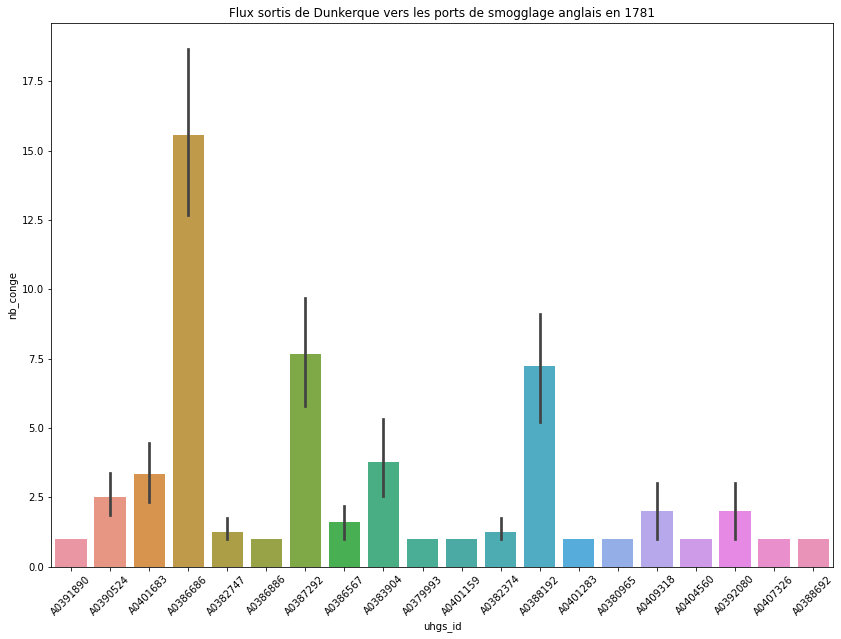

In [263]:
annee=1781

data_to_plot = tomap.query('year=={}'.format(annee)) #ou 1790

plt.figure(figsize=(14, 10))
by_port = sns.barplot(x = 'uhgs_id', y = 'nb_conge', data = data_to_plot)
by_port.set_title('Flux sortis de Dunkerque vers les ports de smogglage anglais en {}'.format(annee))
plt.setp(by_port.get_xticklabels(), rotation=45)
pylab.savefig('Barplot_{}_par_port.jpg'.format(annee), bbox_inches='tight', dpi=300)



In [265]:
import pandas.core.frame as pf
annee=1781
#data_to_plot = tomap.query('year==1781') #ou 1790


gdata = pf.DataFrame({'count' : tomap.groupby( [ "year", "uhgs_id"] ).size()}).reset_index()
print(gdata)

gdata_monthtly = pf.DataFrame({'count' : tomap.groupby( [ "month", "uhgs_id"] ).size()}).reset_index()
print(gdata_monthtly)


      year   uhgs_id  count
0   1781.0  A0379993      1
1   1781.0  A0380965      1
2   1781.0  A0382374      4
3   1781.0  A0382747      4
4   1781.0  A0383904      9
5   1781.0  A0386567      5
6   1781.0  A0386686      9
7   1781.0  A0386886      4
8   1781.0  A0387292      9
9   1781.0  A0388192      9
10  1781.0  A0388692      1
11  1781.0  A0390524      8
12  1781.0  A0391890      3
13  1781.0  A0392080      3
14  1781.0  A0401159      1
15  1781.0  A0401283      1
16  1781.0  A0401683      9
17  1781.0  A0404560      1
18  1781.0  A0407326      2
19  1781.0  A0409318      2
20  1790.0  A0379993      1
21  1790.0  A0381691      5
22  1790.0  A0381991      3
23  1790.0  A0382374      3
24  1790.0  A0382747      9
25  1790.0  A0383886      3
26  1790.0  A0383904      9
27  1790.0  A0384561      7
28  1790.0  A0384802      1
29  1790.0  A0386567      7
30  1790.0  A0386686      9
31  1790.0  A0386886      7
32  1790.0  A0387292      9
33  1790.0  A0387612      2
34  1790.0  A0388192

In [253]:
mapayear = pd.merge(
    gdata,
    ports_anglais,
    how="inner",
    left_on='uhgs_id',
    right_on='uhgs_id',
    sort=True,
)

#df = pd.read_json (r'Path where the JSON file is saved\File Name.json')
mapayear.to_csv (r'./data/smogglage_anglais.csv', index = None)

In [266]:
mapamonth = pd.merge(
    gdata_monthtly,
    ports_anglais,
    how="inner",
    left_on='uhgs_id',
    right_on='uhgs_id',
    sort=True,
)

#df = pd.read_json (r'Path where the JSON file is saved\File Name.json')
mapamonth.to_csv (r'./data/smogglage_anglais_mensuel.csv', index = None)